In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
sc.set_figure_params(dpi=100)

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
# ignores FutureWarnings. Helps in readbility.
# Since we are using a conda envrionment with defined package versions we are not concerned with changes in a package's future releases.


In [4]:
datadir = "data"
savedir = "plots"

if not os.path.exists(savedir):
    os.mkdir(savedir)

In [5]:
adata_merge = sc.read(os.path.join(datadir, "merged_data_hvg.h5ad"))

In [6]:
sc.tl.pca(adata_merge, n_comps=50, use_highly_variable=True)

In [7]:
cats = ['pbmc8k', 'GSE65133', 'GSE107572', 'sdy67', 'monacoI', 'monacoII',
       'GSE120502']
adata_merge.obs["dataset_1"] = adata_merge.obs.dataset.cat.reorder_categories(cats)

In [8]:
blues = list(sns.color_palette("Blues", 4).as_hex())
reds = list(sns.color_palette("Reds", 6).as_hex())
adata_merge.uns["dataset_1_colors"] = blues+reds

/opt/conda/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


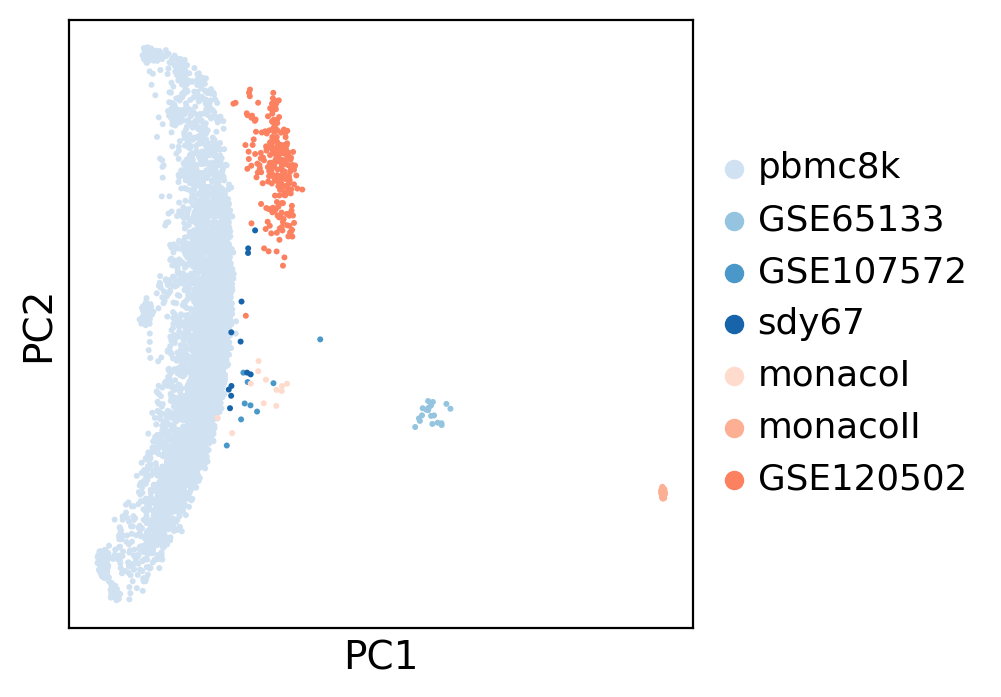

In [9]:
sc.pl.pca(adata_merge, color="dataset_1", title="", show=False)
plt.savefig(os.path.join(savedir, "pca.png"), bbox_inches="tight", dpi=300)
plt.savefig(os.path.join(savedir, "pca.pdf"), bbox_inches="tight")